<a href="https://colab.research.google.com/github/parjanya-rajput/InverseKinematics-3DOF-Robotics/blob/main/Assignment_3DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
# Length of links in cm
l1= 7.15
l2 = 12.5
l3 = 12.5

In [7]:
# #End Position of end effector
x3 = 0
y3 = 32.149

phi = 90 #theta1 + theta2 + theta3
phi = deg2rad(phi)

In [8]:
#Inverse Kinematics

x2 = x3 - l3*cos(phi)
y2 = y3 - l3*sin(phi)

delta = x2**2 + y2**2
costheta2 = ( delta -l1**2 -l2**2)/(2*l1*l2)
if(costheta2**2 > 1):
    print("Cannot reach the defined point")

else:
  sintheta2 = sqrt(1-costheta2**2)  # elbow down
  theta_2 = arctan2(sintheta2, costheta2)

  sintheta1 = ((l1 +l2 * costheta2)*y2 - l2*sintheta2*x2)/delta
  costheta1 = ((l1 +l2 * costheta2)*x2 + l2*sintheta2*y2)/delta
  theta_1 = arctan2(sintheta1,costheta1)
  theta_3 = phi-theta_1-theta_2

  print('Theta-1: ', rad2deg(theta_1))
  print('Theta-2: ', rad2deg(theta_2))
  print('Theta-3: ', rad2deg(theta_3))

Theta-1:  89.23569988758871
Theta-2:  1.2014710531233188
Theta-3:  -0.4371709407120242


In [9]:
def plot_robot_arm(theta1, theta2, theta3):

    x0, y0, z0 = 0, 0, 0

    x1, y1, z1 = l1 * cos(theta1), l1 * sin(theta1), 0
    x2, y2, z2 = x1 + l2 * cos(theta1 + theta2), y1 + l2 * sin(theta1 + theta2), 0
    x3, y3, z3 = x2 + l3 * cos(theta1 + theta2 + theta3), y2 + l3 * sin(theta1 + theta2 + theta3), 0

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot([x0, x1], [y0, y1], [z0, z1], color='b', linewidth = 5)
    ax.plot([x1, x2], [y1, y2], [z1, z2], color='r',linewidth = 5)
    ax.plot([x2, x3], [y2, y3], [z2, z3], color='g',linewidth = 5)

    ax.scatter([x0, x1, x2, x3], [y0, y1, y2, y3], [z0, z1, z2, z3], color='black', s=100)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3DOF Robot Arm')
    ax.set_xlim([-20, 20])
    ax.set_ylim([-20, 20])
    ax.set_zlim([-20, 20])

    ax.view_init(elev=20, azim=45)

    plt.show()


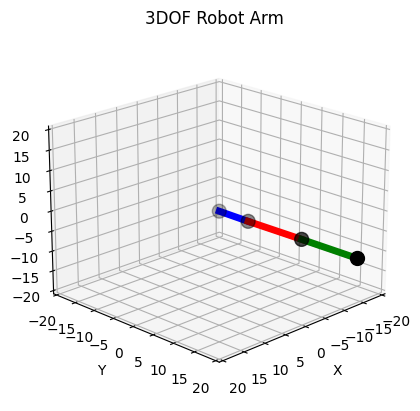

In [10]:
plot_robot_arm(theta_1, theta_2, theta_3)

In [13]:
from re import L
def plot_robot_arm_2d(theta1, theta2, theta3):

    x0, y0 = 0, 0

    x1, y1 = l1 * cos(theta1), l1 * sin(theta1)
    x2, y2 = x1 + l2 * cos(theta1 + theta2), y1 + l2 * sin(theta1 + theta2)
    x3, y3 = x2 + l3 * cos(theta1 + theta2 + theta3), y2 + l3 * sin(theta1 + theta2 + theta3)

    fig = plt.figure(figsize=(8, 6))

    plt.plot([x0, x1], [y0, y1], color='b', linewidth = 5)
    plt.plot([x1, x2], [y1, y2], color='r',linewidth = 5)
    plt.plot([x2, x3], [y2, y3],  color='g',linewidth = 5)

    plt.scatter([x0, x1, x2, x3], [y0, y1, y2, y3],color='black', s=100)
    plt.xlim(-1,35)
    plt.ylim(-1,35)


    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)

    plt.show()

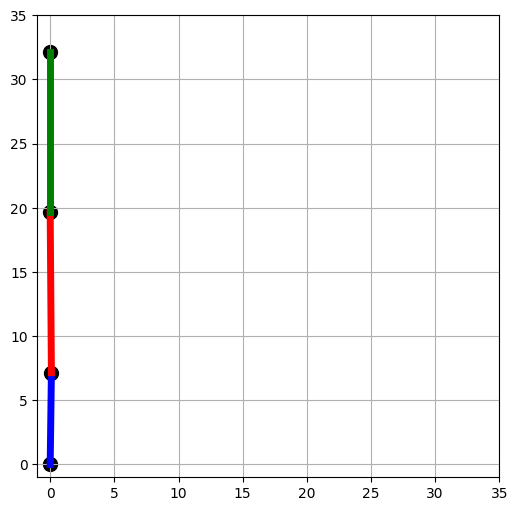

In [14]:
plot_robot_arm_2d(theta_1, theta_2, theta_3)

In [15]:
#Link length

L1 = 190
L2 = 125
L3 = 125

In [16]:
#Inputs
X = 15
Y = 20
theta = 0

theta = deg2rad(theta)

In [35]:
def plot_robot_arm_2d_lab(theta1, theta2, theta3):

    x0, y0 = 0, 0

    x1, y1 = L1 * cos(theta1), L1 * sin(theta1)
    x2, y2 = x1 + L2 * cos(theta1 + theta2), y1 + L2 * sin(theta1 + theta2)
    x3, y3 = x2 + L3 * cos(theta1 + theta2 + theta3), y2 + L3 * sin(theta1 + theta2 + theta3)

    fig = plt.figure(figsize=(8, 6))

    plt.plot([x0, x1], [y0, y1], color='b', linewidth = 5)
    plt.plot([x1, x2], [y1, y2], color='r',linewidth = 5)
    plt.plot([x2, x3], [y2, y3],  color='g',linewidth = 5)

    plt.scatter([x0, x1, x2, x3], [y0, y1, y2, y3],color='black', s=100)
    plt.xlim(-1,300)
    plt.ylim(-1,300)


    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)

    plt.show()

In [18]:
#Inverse Kinematics(Lab_Method)

la = sqrt(X**2 + Y**2)
theta1 = arctan2(X,Y)
theta2 = arctan2(Y,X)


lc = L1 * cos(theta)
ld = L1 * sin(theta)

theta3 = pi/2 - theta

x = X - lc
y = Y - ld

l2 = sqrt(x**2 + y**2)

theta4 = arctan2(y,x)
theta5 = arctan2(x,y)

costheta6 = (lc**2 + L2**2 - L3**2)/(2*lc*L2)
sintheta6 = sqrt(1-(costheta6**2))

theta6 = arctan2(sintheta6,costheta6)

costheta7 = (L3**2 + lc**2 - L2**2)/(2*L3*lc)

sintheta7 = sqrt(1-(costheta7**2))

theta7 = arctan2(sintheta7,costheta7)

costheta8 = (L2**2 + L3**2 - lc**2)/(2*L2*L3)

sintheta8 = sqrt(1-(costheta8**2))

theta8 = arctan2(sintheta8,costheta8)

theta_A = pi - theta4 + theta7
theta_B = theta8 - (pi/2)
theta_C = theta6 - theta5 + theta3 - pi/2


print('Theta-1: ', rad2deg(theta_A))
print('Theta-2: ', rad2deg(theta_B))
print('Theta-3: ', rad2deg(theta_C))


Theta-1:  47.05560386297355
Theta-2:  8.928395777366882
Theta-3:  124.0160003596596


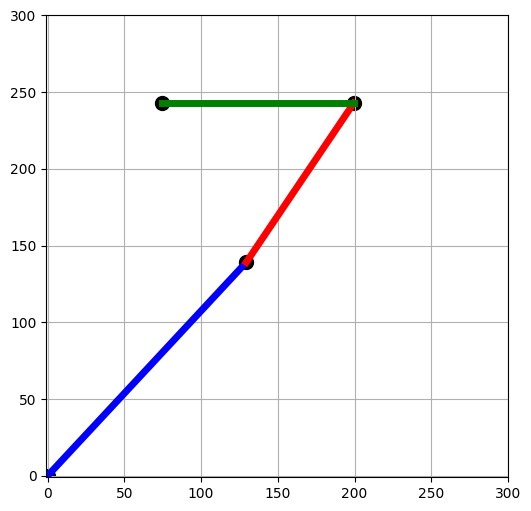

In [36]:
plot_robot_arm_2d_lab(theta_A, theta_B, theta_C)